    Matthew Schaelling
    Math 402
    Homework 10.1

In [37]:
import numpy as np
import scipy.linalg as la
import time
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

#### 10.1 Use calculus to derive the least squares estimator in the bivariate case:
(i) Let $y_i = \beta_0 + \beta_1 x_i + \epsilon_i$. Solve the system of equations for $\beta$ that comes from minimizing the sum of squares $\sum_i \left( \beta_0 + \beta_1 x_i - y_i \right)$, in order to
derive explicit formulae for the estimators $\hat{\beta}_0$ and $\hat{\beta}_1$.
Show that this agrees with the formula $\hat{\beta} = \left( X^T X \right)^{-1} X^T Y$ proved in Volume 1. <br>
(ii) Use the second-order sufficient condition to prove that this estimator is
indeed a minimizer in the bivariate case.

*Solution is provided on paper homework.*

#### 10.2 Code up a least-squares solver in NumPy.
Your method should accept two NumPy arrays: an $n$ x $d$ array $X$ (an $n$-fold sample from the independent variables) and an array $Y$ of length $n$ (an $n$-fold sample from the dependent variable) and return an array $\hat{\beta} = \left( X^T X \right)^{-1} X^T Y$ of length $d$ (the estimated coefficients of the linear model). Instead of computing the inverse $\left( X^T X \right)^{-1}$, solve the system $X^T X \hat{\beta} = XY$ using $\text{numpy.linalg.solve}$ (why?).<br>
Let $n = 10^3$. Generate artificial data with three independent variables $d = 3$, by setting $X = \, \text{np.random.random((n, 3))}$ and let $\beta = [1,2,3].$ Set $\text{e} \, = \text{np.random.random(n)}$, and $y = \text{np.dot(X, beta) + e}.$ <br>
Run your solver on the generated data $X$ and $Y$ and compare the result to the known value of $\beta$.

In [2]:
def least_squares(X, Y):
    """Good Luck!"""
    return la.solve(X.T.dot(X), X.T.dot(Y))

In [4]:
n = 10**3
X = np.random.random((n,3))
beta = np.array([1,2,3])
e = np.random.randn(n)
Y = np.dot(X,beta) + e
beta_hat = least_squares(X,Y)

print("True values of beta:\t{}".format(beta))
print("Estimated beta hat:\t{}".format(beta_hat))

True values of beta:	[1 2 3]
Estimated beta hat:	[ 1.07153033  2.05666274  2.90247785]


#### 10.3
Let $X = QR$ be a $QR$ decomposition for $X$, with $Q$ orthonormal, and
$$
R = \begin{bmatrix}
      R_1 \\
      0
    \end{bmatrix}
$$
upper triangular, with $R_1 \in M_d$ invertible. Let
$$
Q^T Y = \begin{bmatrix}
        C \\
        D
        \end{bmatrix}
$$
with $C \in \mathbb{R}^d$ and $D \in \mathbb{R}^{n-d}$. Prove that the least squares estimator $\hat{\beta} = argmin_\beta ||X \beta - Y||_2^2$ can be computed by solving for $\hat{\beta}$ in the system $R_1 \hat{\beta} = C$.<br>
Hint: $||Q^T \left(X \beta - Y \right) ||_2^2 = ||X \beta - Y ||_2^2$.

*Solution is provided on paper homework.*

#### 10.4 Code up a least-squares solver in NumPy that uses QR decomposition and the result of the previous problem to compute $\hat{\beta}$.
You should use $\text{scipy.linalg.solve_triangular}$ to solve the system instead of inverting $R_1$. (How is $\text{solve_triangular}$ better than plain $\text{solve}$?) Your method should accept two NumPy arrays: an $n$ x $d$ array $X$ (an $n$-fold sample from the independent variables) and an array $Y$ of length $n$ (an $n$-fold sample from the dependent variable) and return an array $\hat{\beta}$ of length $d$ (the estimated coefficients of the linear model).<br>Using the same artificial data from problem 10.2, run your solver on the generated data $X$ and $Y$ and compare the result to the known value of $\beta$. Compare the speed and accuracy of your QR-based solver to the naïve solver of problem 10.2.

In [19]:
def qr_least_squares(X,Y):
    """You can do it!"""
    n,d = X.shape
    Q,R = la.qr(X)
    return la.solve_triangular(R[:d],Q.T.dot(Y)[:d])

qr_beta_hat = qr_least_squares(X,Y)
print("QR Estimated beta hat:\t{}".format(qr_beta_hat))

QR Estimated beta hat:	[ 1.07153033  2.05666274  2.90247785]


In [24]:
start = time.clock()
least_squares(X,Y)
naive_time = time.clock() - start
start = time.clock()
qr_least_squares(X,Y)
qr_time = time.clock() - start
print("Naive Method:\t{}\nQR Method:\t{}".format(naive_time, qr_time))

Naive Method:	0.000437743050981
QR Method:	0.0202461289279


#### 10.5 Four famous datasets.
The data for this problem are saved in the file $\text{OLSdata.npy}$ (Available on LearningSuite). For each dataset, compute the mean and sample variance for $x$ and $y$, and use your code from the previous problem
to compute the slope and intercept of the line of best fit; then plot the line
and the data on the same graph. How do you interpret the results?

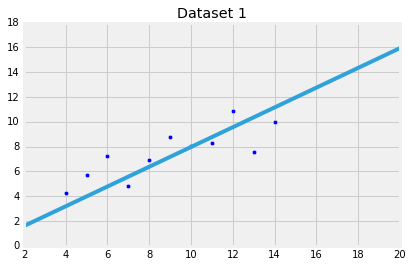

Beta Hat:	0.796803196803
X mean:		9.0
Y mean:		7.50090909091




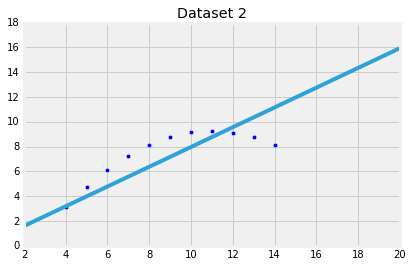

Beta Hat:	0.796793206793
X mean:		9.0
Y mean:		7.50090909091




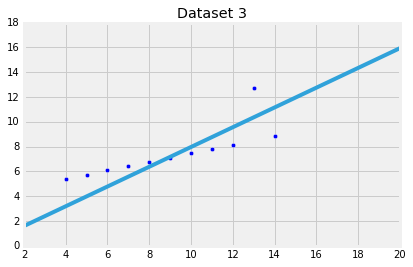

Beta Hat:	0.796673326673
X mean:		9.0
Y mean:		7.5




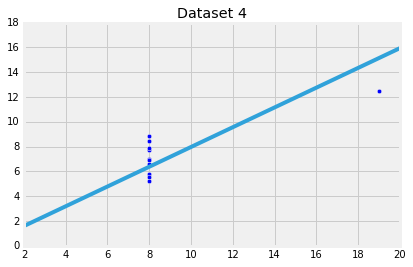

Beta Hat:	0.796783216783
X mean:		9.0
Y mean:		7.50090909091




In [43]:
data = np.load('OLSdata.npy')
j = 1
for i in range(0, len(data[0]), 2):
    x, y = data[:,i:i+1], data[:,i+1:i+2]
    beta = qr_least_squares(x,y)
    plt.scatter(x,y)
    domain = np.linspace(2,20)
    plt.plot(domain, domain*beta[0][0])
    plt.title("Dataset {}".format(j))
    plt.xlim((2,20))
    plt.show()
    print('Beta Hat:\t{}'.format(beta[0][0]))
    print('X mean:\t\t{}'.format(x.mean()))
    print('Y mean:\t\t{}\n\n'.format(y.mean()))
    j += 1